In [1]:
%matplotlib inline

In [2]:
import random
import numpy as np
import networkx as nx
import matplotlib as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


from helpers import draw_nodes, draw_edges, signed_layout, get_borderless_fig

In [3]:
g = nx.read_gpickle('graphs/tribe.pkl')

In [4]:
pos = signed_layout(g)

In [5]:
sns.color_palette("Paired").as_hex()

['#a6cee3',
 '#1f78b4',
 '#b2df8a',
 '#33a02c',
 '#fb9a99',
 '#e31a1c',
 '#fdbf6f',
 '#ff7f00',
 '#cab2d6',
 '#6a3d9a',
 '#ffff99',
 '#b15928']

In [6]:
ALPHA = 0.4

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


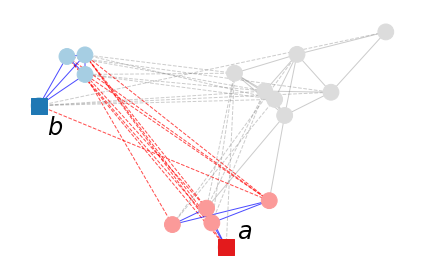

In [7]:
random.seed(54321)
np.random.seed(54321)


fig, ax = get_borderless_fig()

pal = sns.color_palette("Paired").as_hex()
mycm_lighter = ListedColormap(['#a6cee3', '#fb9a99', '#dcdcdc'])  # 0, 4, and light grey
mycm_darker = ListedColormap(['#1f78b4', '#e31a1c'])  # 1, 4


# draw_nodes(g, pos=pos, ax=ax, labels=None)
comms = [(0, 1, 14, 15), (4, 8, 9, 12, 13), (2, 3, 5, 6, 7, 10, 11)]
colors = np.zeros(g.number_of_nodes())
for i, com in enumerate(comms):
    colors[list(com)] = i

nx.draw_networkx_nodes(
    g, pos=pos,
    ax=ax, node_color=colors, node_size=250, cmap=mycm_lighter
)
nx.draw_networkx_nodes(
    g, pos=pos,
    nodelist=[0, 9],
    node_color=[0, 2],
    cmap=mycm_darker,
    node_shape='s',
    node_size=250,
)    
# nx.draw_networkx_labels(g, pos=pos, ax=ax, font_color='white', font_family='', font_weight=1000)
# draw_edges(g, pos=pos, ax=ax, alpha=ALPHA)

target_comm = comms[0] + comms[1]
grey_pos_edge_list = [(u, v) for u, v in g.edges() if (u not in target_comm or v not in target_comm) and g[u][v]['sign'] > 0]
grey_neg_edge_list = [(u, v) for u, v in g.edges() if (u not in target_comm or v not in target_comm) and g[u][v]['sign'] < 0]
nx.draw_networkx_edges(g, pos, grey_neg_edge_list, style='dashed', edge_color='grey', ax=ax, alpha=ALPHA)
nx.draw_networkx_edges(g, pos, grey_pos_edge_list, style='solid', edge_color='grey', ax=ax, alpha=ALPHA)

subg_pos_edge_list = [(u, v) for u, v in g.edges() if (u in target_comm and v in target_comm) and g[u][v]['sign'] > 0]
subg_neg_edge_list = [(u, v) for u, v in g.edges() if (u in target_comm and v in target_comm) and g[u][v]['sign'] < 0]
nx.draw_networkx_edges(g, pos, subg_neg_edge_list, style='dashed', edge_color='red', ax=ax, alpha=ALPHA + 0.3)
nx.draw_networkx_edges(g, pos, subg_pos_edge_list, style='solid', edge_color='blue', ax=ax, alpha=ALPHA + 0.3)

ax.text(0.15, -0.42, '$a$', fontsize=24)
ax.text(-0.3, -0.05, '$b$', fontsize=24)
fig.tight_layout()
fig.savefig('figs/intro1.pdf', transparent=True)

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


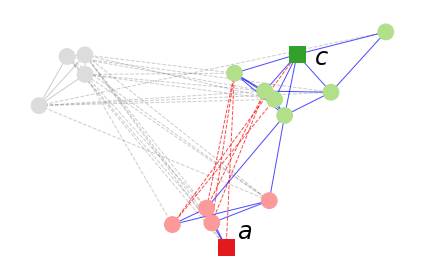

In [8]:
random.seed(54321)
np.random.seed(54321)
# pos = signed_layout(g)

fig, ax = get_borderless_fig()

pal = sns.color_palette("Paired").as_hex()
mycm_lighter = ListedColormap(['#b2df8a', '#fb9a99', '#dcdcdc'])  # 2, 4, and light grey
mycm_darker = ListedColormap(['#33a02c', '#e31a1c'])  # 3, 4


# draw_nodes(g, pos=pos, ax=ax, labels=None)
comms = [(2, 3, 5, 6, 7, 10, 11), (4, 8, 9, 12, 13), (0, 1, 14, 15)]
colors = np.zeros(g.number_of_nodes())
for i, com in enumerate(comms):
    colors[list(com)] = i

nx.draw_networkx_nodes(
    g, pos=pos,
    ax=ax, node_color=colors, node_size=250, cmap=mycm_lighter
)
nx.draw_networkx_nodes(
    g, pos=pos,
    nodelist=[7, 9],
    node_color=[0, 2],
    cmap=mycm_darker,
    node_shape='s',
    node_size=250,
)    
# nx.draw_networkx_labels(g, pos=pos, ax=ax, font_color='white', font_family='', font_weight=1000)
# draw_edges(g, pos=pos, ax=ax, alpha=ALPHA)

target_comm = comms[0] + comms[1]
grey_pos_edge_list = [(u, v) for u, v in g.edges() if (u not in target_comm or v not in target_comm) and g[u][v]['sign'] > 0]
grey_neg_edge_list = [(u, v) for u, v in g.edges() if (u not in target_comm or v not in target_comm) and g[u][v]['sign'] < 0]
nx.draw_networkx_edges(g, pos, grey_neg_edge_list, style='dashed', edge_color='grey', ax=ax, alpha=ALPHA)
nx.draw_networkx_edges(g, pos, grey_pos_edge_list, style='solid', edge_color='grey', ax=ax, alpha=ALPHA)

subg_pos_edge_list = [(u, v) for u, v in g.edges() if (u in target_comm and v in target_comm) and g[u][v]['sign'] > 0]
subg_neg_edge_list = [(u, v) for u, v in g.edges() if (u in target_comm and v in target_comm) and g[u][v]['sign'] < 0]
nx.draw_networkx_edges(g, pos, subg_neg_edge_list, style='dashed', edge_color='red', ax=ax, alpha=ALPHA + 0.3)
nx.draw_networkx_edges(g, pos, subg_pos_edge_list, style='solid', edge_color='blue', ax=ax, alpha=ALPHA + 0.3)
ax.text(0.15, -0.42, '$a$', fontsize=24)
ax.text(0.33, 0.20, '$c$', fontsize=24)

fig.tight_layout()
fig.savefig('figs/intro2.pdf', transparent=True)